# Estimating Costs

## Approximating Costs

In [1]:
import pandas as pd

In [2]:
sklearn_v_rapids = pd.read_csv('AWS Results/sklearn_v_rapids_results.csv',
                              index_col=0, 
                               header=[0, 1], skipinitialspace=True)

In [3]:
results_df_sklearn = sklearn_v_rapids['Scikit-Learn']
results_df_sklearn['Cost'] = results_df_sklearn['Average']/3600 * 0.379

/tmp/ipykernel_22440/2227054005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_sklearn['Cost'] = results_df_sklearn['Average']/3600 * 0.379


In [4]:
results_df_rapids = sklearn_v_rapids['Rapids']
results_df_rapids['Cost'] = results_df_rapids['Average']/3600 * 0.1344

/tmp/ipykernel_22440/490145590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_rapids['Cost'] = results_df_rapids['Average']/3600 * 0.1344


In [5]:
spark = pd.read_csv('AWS Results/spark_ml_results.csv')

In [6]:
spark['Cost'] = spark['Average']/3600*(3*0.192)

## Vizualization

In [7]:
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, averages_spark, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')
    
    axs.bar(ind+width+width, 
        height=averages_spark, 
        width = width, 
        color='purple',label='Spark')

    axs.set_ylabel('Average Cost ($)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=12)
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

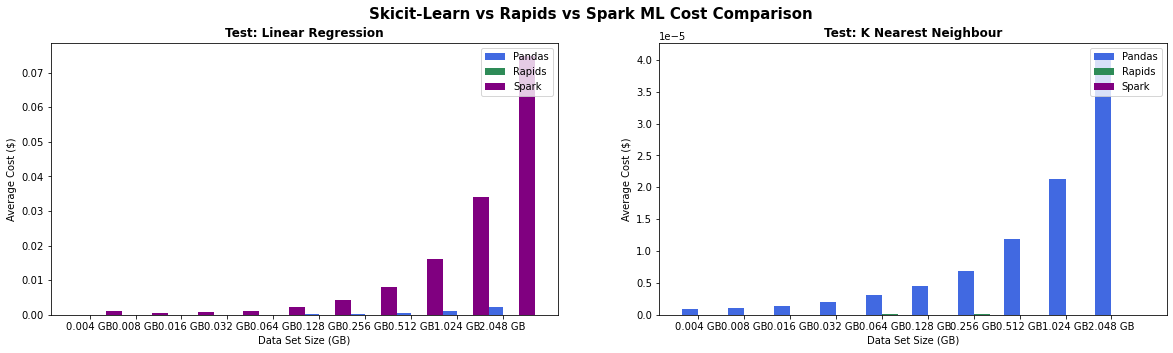

In [9]:
NUM_DSIZE_DOUBLINGS = 10

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 5)

fig.suptitle('Skicit-Learn vs Rapids vs Spark ML Cost Comparison', fontsize=15, fontweight="bold")

# Setting the number of bars
ind = np.arange(NUM_DSIZE_DOUBLINGS)

# Defining the width between the bars
width = 0.35

# Defining the bar labels
bar_labels = np.round(results_df_sklearn['Test Size'].drop_duplicates(), 3).astype(str) + " GB"

plot(ax1, 
     results_df_sklearn[results_df_sklearn['Test'] == 'Linear Regression']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']['Cost'],
     spark[spark['Test'] == 'Linear Regression']['Cost'],
     'Linear Regression')

plot(ax2, 
     results_df_sklearn[results_df_sklearn['Test'] == 'K Nearest Neighbour']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'K Nearest Neighbour']['Cost'],
     spark[spark['Test'] == 'K Nearest Neighbour']['Cost'],
     'K Nearest Neighbour')
plt.savefig('AWS Results/ml_cost.png')
plt.show()

In [10]:
# Defining the plot that is used
def plot_nospark(axs, averages_pandas, averages_rapids, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    axs.set_ylabel('Average Cost ($)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=12)
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

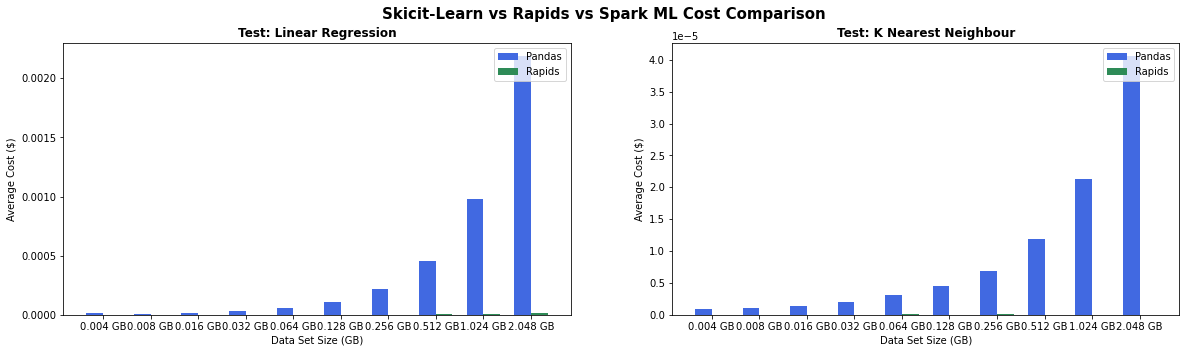

In [11]:
NUM_DSIZE_DOUBLINGS = 10

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 5)

fig.suptitle('Skicit-Learn vs Rapids vs ML Cost Comparison', fontsize=15, fontweight="bold")

# Setting the number of bars
ind = np.arange(NUM_DSIZE_DOUBLINGS)

# Defining the width between the bars
width = 0.35

# Defining the bar labels
bar_labels = np.round(results_df_sklearn['Test Size'].drop_duplicates(), 3).astype(str) + " GB"

plot_nospark(ax1, 
     results_df_sklearn[results_df_sklearn['Test'] == 'Linear Regression']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']['Cost'],
     'Linear Regression')

plot_nospark(ax2, 
     results_df_sklearn[results_df_sklearn['Test'] == 'K Nearest Neighbour']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'K Nearest Neighbour']['Cost'],
     'K Nearest Neighbour')
plt.savefig('AWS Results/ml_cost_nospark.png')
plt.show()